In [151]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [122]:
df=pd.read_csv("C:/Users/surendar.reddy/Documents/data Science projet_Data traine/DataTrained_Project_Week-1/winequality-red.csv")
pd.set_option('display.max_rows', None)

In [123]:
print(df.shape)

(1599, 12)


In [124]:
print(df.isnull().sum())
#There are no Null Values in the dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [125]:
df.describe()
#the Data looks very Normal with min and max close to mean
#No unexpected values seen as of now.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [126]:
df.info()
#Looks there is no need of encodding required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [127]:
x=df.drop(columns=['quality'],axis=1)
y=df['quality']
y.value_counts()
#The dataFrame do not look very balanced
#Need to address Unbalance in the dataset

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

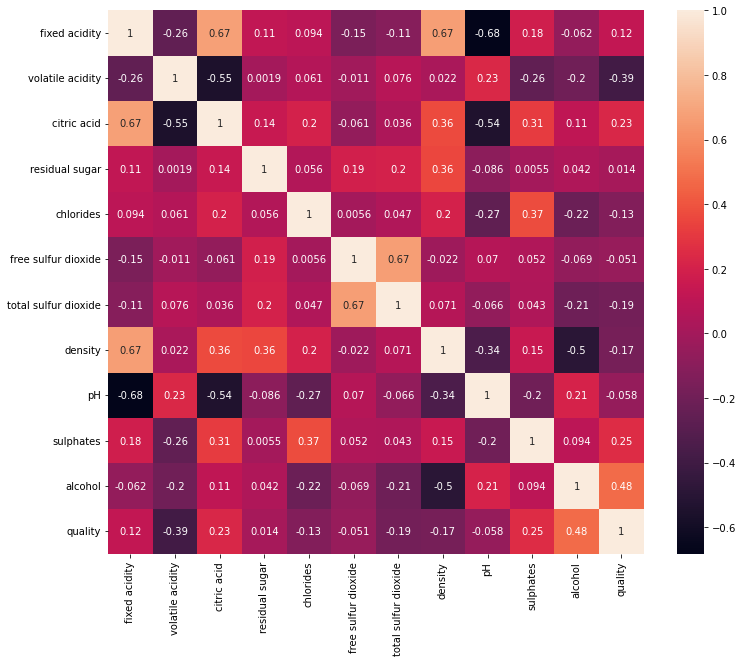

In [70]:
#Beforee I go balancing the dataset, would check for correlation and Multicollinearity if theer exsist and eliminate the columns which do not contribute is predicting the quality
corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()
# I see a more correlation between; Fixed Acidity Vs Citric acid; Fixed Acidity Vs density, PH etc , which is around~ +/- 0.6, is is not very high so dicided to proceed with all the coloumns

In [71]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.stripplot(x=df[column],y=df['quality'])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# The graphs data is almost evenly distributed across quality classes

Error in callback <function flush_figures at 0x000002EC2FE2B3A0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()  

# Volatile acidity, citric acid-NotNormality distributed
#Residual sugar, alcohol looks rightscrewed
#power trasformation would be needed

List of Ascepts I will proceed with 

1)Trasform-Powertrasformation
3) Balance the data set-SMOTE
2)Check for VIF-multicollinearity issue
4)Scalar-test, train split

In [128]:
x=df.drop(columns=['quality'],axis=1)
y=df['quality']
df.skew().sort_values(ascending=False)

# screness correction need to be between +0.5 and -0.5

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
quality                 0.217802
pH                      0.193683
density                 0.071288
dtype: float64

In [129]:
#Screwness Correction
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
#x.skew().sort_values(ascending=False)
#x=pd.DataFrame(x_new,columns=x)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
5,-0.442666,0.802929,-1.531109,-0.837193,-0.226113,-0.021924,0.107498,0.564442,1.275690,-0.581650,-1.075025
6,-0.094677,0.497996,-1.122699,-1.404288,-0.566402,0.193450,0.669200,-0.175390,-0.047962,-1.739501,-1.075025
7,-0.516971,0.753478,-1.531109,-3.045490,-0.814706,0.193450,-0.799912,-1.140757,0.529832,-1.605418,-0.249498
8,-0.161308,0.391782,-1.391443,-0.380998,-0.335468,-0.555712,-1.011651,0.036967,0.339033,-0.485467,-0.921731
9,-0.370000,-0.058175,0.539338,2.116898,-0.448846,0.385115,1.475168,0.564442,0.275038,1.076325,0.292864


In [130]:
#!pip install imblearn
#Balance the Data set
from imblearn.over_sampling import SMOTE
stategy = {7:510,4:510, 8:510,3:510}
#510 HERE IMPLIES 75% OF MAJORITY CLASS
oversample=SMOTE(sampling_strategy=stategy)
x_smoted, y_smoted=oversample.fit_resample(x,y)

# summarize distribution
counter = y_smoted.value_counts()
for k,v in counter.items():
    per = v / len(y_smoted) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
#THE dataSET IS BALANCED NOW
x=pd.DataFrame(x_smoted,columns=x.columns)
x


Class=5, n=681 (20.274%)
Class=6, n=638 (18.994%)
Class=7, n=510 (15.183%)
Class=4, n=510 (15.183%)
Class=8, n=510 (15.183%)
Class=3, n=510 (15.183%)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
5,-0.442666,0.802929,-1.531109,-0.837193,-0.226113,-0.021924,0.107498,0.564442,1.275690,-0.581650,-1.075025
6,-0.094677,0.497996,-1.122699,-1.404288,-0.566402,0.193450,0.669200,-0.175390,-0.047962,-1.739501,-1.075025
7,-0.516971,0.753478,-1.531109,-3.045490,-0.814706,0.193450,-0.799912,-1.140757,0.529832,-1.605418,-0.249498
8,-0.161308,0.391782,-1.391443,-0.380998,-0.335468,-0.555712,-1.011651,0.036967,0.339033,-0.485467,-0.921731
9,-0.370000,-0.058175,0.539338,2.116898,-0.448846,0.385115,1.475168,0.564442,0.275038,1.076325,0.292864


In [131]:
y=pd.DataFrame(y_smoted,columns=['quality'])
y

,quality
0,5
1,5
2,5
3,6
4,5
5,5
6,5
7,7
8,7
9,5


In [132]:
#Multicollinearity check

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns


vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

#If the VIF corse is more then 5 will remove one of the feature, So Fixed acidity and density are corelated.
#According to even research on Fixed acidty and density, i says there are highly correlated
#So would remove density


                 feature       VIF
0          fixed acidity  7.234957
1       volatile acidity  2.972700
2            citric acid  4.390735
3         residual sugar  1.880836
4              chlorides  1.448064
5    free sulfur dioxide  3.791271
6   total sulfur dioxide  4.440217
7                density  6.537635
8                     pH  3.549588
9              sulphates  1.821481
10               alcohol  3.771410


In [133]:
x=x.drop(columns=['density'],axis=1)
x.shape

(3359, 10)

In [134]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.4391458 ,  0.62201122, -1.38155927, ...,  1.18113674,
        -0.53975331, -1.26201452],
       [-0.15284876,  1.25015212, -1.38155927, ..., -0.83620892,
         0.42224585, -0.70542629],
       [-0.15284876,  0.84408302, -1.12099729, ..., -0.43027864,
         0.214078  , -0.70542629],
       ...,
       [ 1.28345244, -0.98516351,  1.26077357, ..., -1.13355544,
         0.24522823,  0.59305007],
       [ 0.27206198, -0.66511087,  0.66514166, ...,  0.09033139,
         0.49399752,  0.94777245],
       [-2.24313081, -0.26272083, -1.18341883, ...,  1.12327691,
         1.18426824,  1.89623683]])

In [135]:
#Train the data to the model
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y,test_size=0.25, random_state=100)

In [136]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
clf_accuracy=metrics.r2_score(y_test,y_pred)
clf_accuracy

0.8328562691131498

In [137]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [138]:
bclf=BaggingClassifier()
bclf.fit(x_train,y_train)
y_pred=bclf.predict(x_test)
bclf_accuracy=metrics.r2_score(y_test,y_pred)
bclf_accuracy

0.8698470948012232

In [139]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
knn_accuracy=metrics.r2_score(y_test,y_pred)
knn_accuracy

0.7885586136595311

In [140]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
RF_accuracy=metrics.r2_score(y_test,y_pred)
RF_accuracy

0.9168848114169215

In [141]:
# Crossvalidation score also show there is no overfitting isse
from sklearn.model_selection import cross_val_score
CS_RF=cross_val_score(RF,x_scaled,y,cv=5)
CS_RF.mean()

0.777018132141083

In [142]:
from sklearn.model_selection import cross_val_score
CS_bclf=cross_val_score(bclf,x_scaled,y,cv=5)
CS_bclf.mean()

0.7460515577318856

In [143]:
#Would save Random Forest over other models and Hypertune for better accuracy

In [153]:
RF=RandomForestClassifier()
params={'n_estimators':[15,18],
        'criterion':['entropy','gini'],
        'max_depth':[10,11,12,13,14,15,16,17,18,19,20],
         'min_samples_split':[10,11,15],
         'min_samples_leaf':[4,5]
       }
grd=GridSearchCV(RF,param_grid=params,)
grd.fit(x_train,y_train)
RF=grd.best_estimator_
y_pred=RF.predict(x_test)
RF_accuracy=metrics.r2_score(y_test,y_pred)
RF_accuracy

0.8725871559633027